# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [4]:
cnn = tf.keras.models.load_model('trained_plant_disease_model')

#Visualising and Performing Prediction on Single image

In [2]:
#Test Image Visualization
import cv2
image_path = 'images.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'plt' is not defined

## Testing Model

In [21]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 345ms/step


In [22]:
print(predictions)

[[4.28677849e-09 6.19470484e-07 2.68934430e-09 2.68305655e-10
  2.26616087e-11 3.26965455e-09 5.08354336e-09 7.64413853e-05
  3.33446935e-02 3.14082360e-09 2.79706501e-11 5.80855086e-11
  6.68655602e-08 6.98915710e-06 1.65192881e-12 1.87576488e-09
  2.17198118e-04 2.15922280e-09 1.23146965e-04 2.20336496e-08
  8.06479657e-04 4.76138406e-10 7.65565666e-11 3.12277916e-12
  5.78324411e-12 6.12575095e-13 2.71314367e-08 1.08533184e-13
  9.38912947e-10 9.63916659e-01 1.50776457e-03 2.75397011e-10
  4.95042798e-08 9.53411612e-13 5.21345445e-13 7.65967964e-13
  2.60291277e-15 1.12620612e-12]]


In [23]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

29


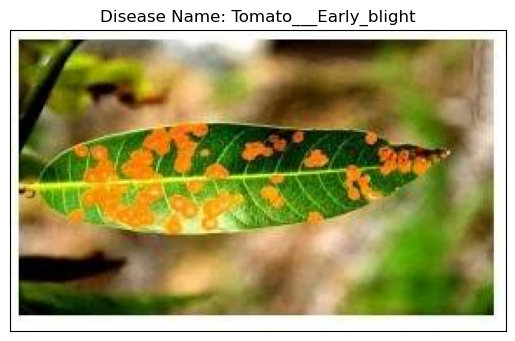

In [24]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()